#### Darrah 2020 abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Darrah 2020 data

**Developed by**: Mairi McClean

**Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich

**v230307**

In [2]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as plt
import pybiomart as biomart
from matplotlib import colors
from matplotlib import rcParams

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.2
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.3
arrow               1.2.3
asttokens           NA
attr                22.2.0
babel               2.12.1
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
certifi             2022.12.07
cffi                1.15.1
charset_normalizer  2.1.1
colorama            0.4.6
comm                0.1.2
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.6
decorator           5.1.1
executing           1.2.0
fastjsonschema      NA
fqdn                NA
future              0.18.3
h5py                3.8.0
hypergeom_ufunc     NA
idna                3.4
igraph              0.10.4
ipykernel           6.21.2
ipython_genutils    0.2.0
isoduration         NA
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsonpointer         2.3
jsonschema    

### Read in datasets

In [4]:
adata_wk13 = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/Darrah2020/SCP796/SCP796_Week13_postBCG.raw.h5ad')
adata_wk13

AnnData object with n_obs × n_vars = 98993 × 32681
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage'

In [5]:
adata_wk25 = sc.read_h5ad('/Volumes/Lacie/data_lake/Mairi_example/INBOX/sc_downloads/Darrah2020/SCP796/SCP796_Week25_postBCG.raw.h5ad')
adata_wk25

AnnData object with n_obs × n_vars = 63497 × 32580
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage'

### Concatenate objects

In [13]:
adata_total = adata_wk13.concatenate(adata_wk25, join='inner', batch_key='time', batch_categories=['13', '25'])
adata_total

/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/Users/mairi.mcclean/mambaforge/envs/scanpy_local/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],


AnnData object with n_obs × n_vars = 162490 × 32437
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage', 'time'

In [14]:
adata_total.var

""
A1BG
A1CF
A2M
A2ML1
A3GALT2
...
ZYG11A
ZYG11B
ZYX
ZZEF1


In [15]:
adata_total.obs

,species,species__ontology_label,library_preparation_protocol,library_preparation_protocol__ontology_label,cellID,organ,organ__ontology_label,vaccination,vaccination__ontology_label,sex,...,sequencing_instrument_manufacturer_model,sequencing_instrument_manufacturer_model__ontology_label,paired_ends,read_length,vaccination_route,vaccination__time_since,vaccination__time_since__unit,vaccination__time_since__unit_label,vaccination__dosage,time
Week13_DF16_100-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_100,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1000-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1000,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1002-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1002,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1004-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1004,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
Week13_DF16_1005-13,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week13_DF16_1005,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,13,UO_0000034,week,Low,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Week25_OVN.stim_995-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_995,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_996-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_996,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_997-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_997,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25
Week25_OVN.stim_998-25,NCBITaxon_9544,Macaca mulatta,EFO_0008919,Seq-Well,Week25_OVN.stim_998,UBERON_0002048,lung,VO_0000771,BCG vaccine,unknown,...,EFO_0009173,Illumina NextSeq 500,True,20-50,intradermal,25,UO_0000034,week,High,25


In [6]:
# Make names unique to avoid computational issues re repeated gene names
adata.var_names_make_unique()
sample_object = adata.copy()
sample_object

AnnData object with n_obs × n_vars = 98993 × 32681
    obs: 'species', 'species__ontology_label', 'library_preparation_protocol', 'library_preparation_protocol__ontology_label', 'cellID', 'organ', 'organ__ontology_label', 'vaccination', 'vaccination__ontology_label', 'sex', 'is_living', 'sample_type', 'biosample_id', 'end_bias', 'cell_type', 'cell_type__ontology_label', 'disease', 'disease__ontology_label', 'donor_id', 'Stimulated', 'VaccineRoute', 'VaccineRouteUnique', 'VaccineRouteUniqueGroup', 'sequencing_instrument_manufacturer_model', 'sequencing_instrument_manufacturer_model__ontology_label', 'paired_ends', 'read_length', 'vaccination_route', 'vaccination__time_since', 'vaccination__time_since__unit', 'vaccination__time_since__unit_label', 'vaccination__dosage'

In [7]:
sample_object.var

""
A1BG
A1CF
A2M
A2ML1
A3GALT2
...
ZYG11A
ZYG11B
ZYX
ZZEF1


In [ ]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()



### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:01)


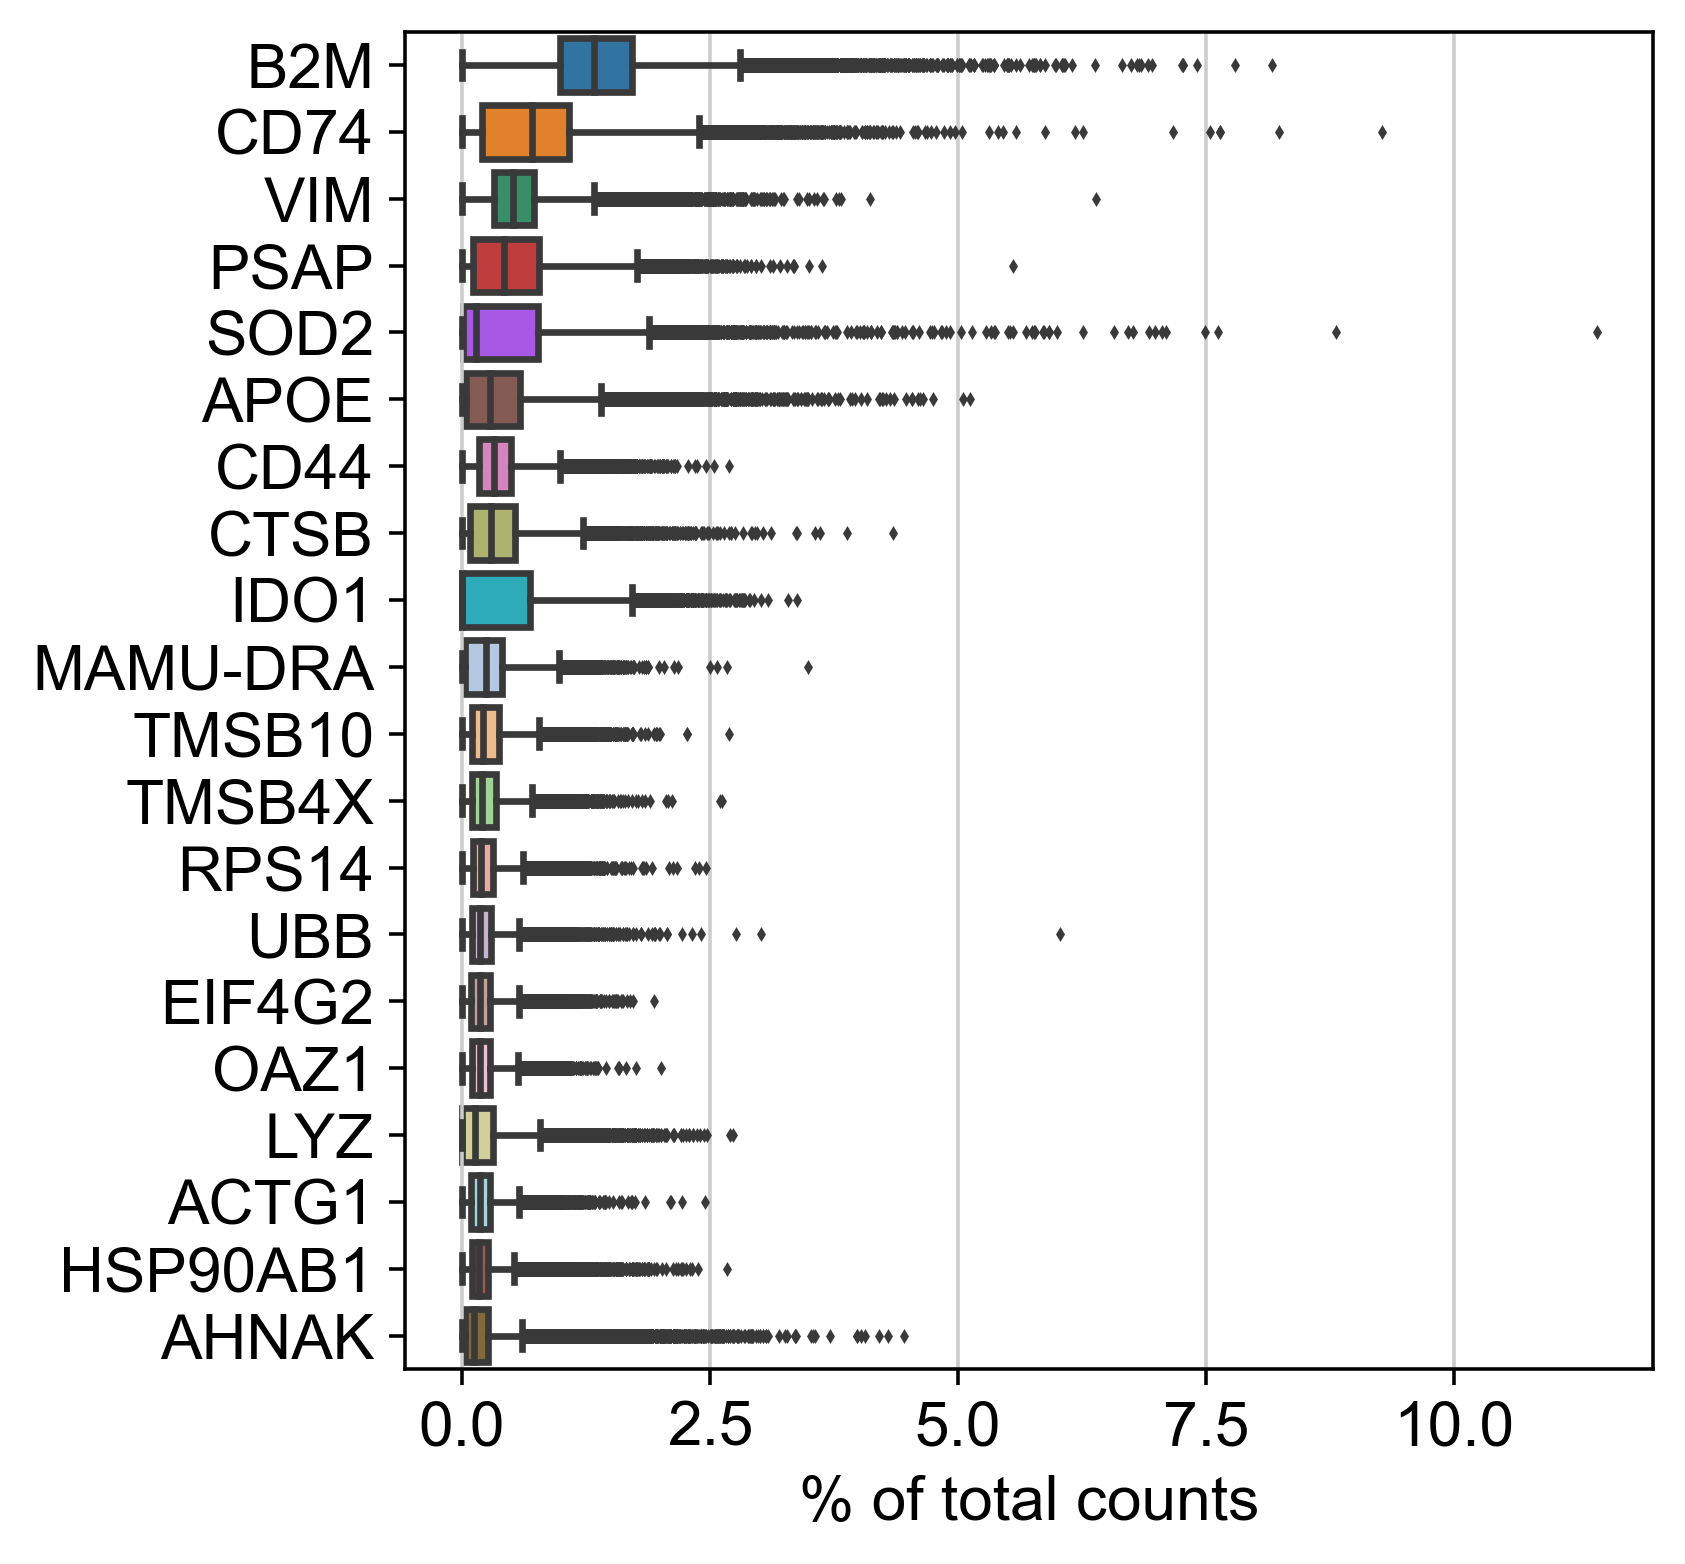

In [9]:
sc.pl.highest_expr_genes(sample_object, n_top=20)

### Filter cells by gene number

In [10]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

98993 32681


In [11]:
sample_object.shape

(98993, 32681)

In [12]:
sample_object.var

""
A1BG
A1CF
A2M
A2ML1
A3GALT2
...
ZYG11A
ZYG11B
ZYX
ZZEF1


### Filter genes by cell number

In [ ]:
# sc.pp.filter_genes(sample_object, min_cells = 3)
# sample_object.shape

# removed because of erroneous QC visualisation graphs

### QC metrics

In [14]:
# identify mitochondrial and ribosomal genes manually
## str.startswith taken from scanpy pbmc tutorial
# Step 1: Make df of mito genes

mito_genes = ['RNR1', 'TV', 'TY', 'ATP8', 'ATP6', 'CO1', 'CO2', 'CO3', 'CYB', 'ND1', 'ND2', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'RNR2', 'TA', 'TR', 'TN', 'TD', 'TC', 'TE', 'TQ', 'TG', 'TH', 'TI', 'TL1', 'TL2', 'TK', 'TM', 'TF', 'TP', 'TS1', 'TS2', 'TT', 'TW', 'TY', 'TV', 'RNR1']
print(mito_genes)

['RNR1', 'TV', 'TY', 'ATP8', 'ATP6', 'CO1', 'CO2', 'CO3', 'CYB', 'ND1', 'ND2', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'RNR2', 'TA', 'TR', 'TN', 'TD', 'TC', 'TE', 'TQ', 'TG', 'TH', 'TI', 'TL1', 'TL2', 'TK', 'TM', 'TF', 'TP', 'TS1', 'TS2', 'TT', 'TW', 'TY', 'TV', 'RNR1']


In [15]:
# Make list into df
mito_genes_df = pd.DataFrame(mito_genes)
print(mito_genes_df)

       0
0   RNR1
1     TV
2     TY
3   ATP8
4   ATP6
5    CO1
6    CO2
7    CO3
8    CYB
9    ND1
10   ND2
11   ND3
12  ND4L
13   ND4
14   ND5
15   ND6
16  RNR2
17    TA
18    TR
19    TN
20    TD
21    TC
22    TE
23    TQ
24    TG
25    TH
26    TI
27   TL1
28   TL2
29    TK
30    TM
31    TF
32    TP
33   TS1
34   TS2
35    TT
36    TW
37    TY
38    TV
39  RNR1


In [16]:
# This makes a new column in "adata.var" called "mito" that will print "true/false" if the same information in gene_id is found in the mito_genes dataframe.

sample_object.var['mito'] = sample_object.var.gene_id.isin(mito_genes_df[0].values)

ValueError: Cannot set a DataFrame with multiple columns to the single column mito

In [ ]:
sample_object.var

In [ ]:
# Same for ribo genes

ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

In [ ]:
# Make a new column in the .var object called "ribo"
sample_object.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)

In [ ]:
sample_object.var

In [ ]:
sample_object.obs

##### Calculate qc metrics

In [ ]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo'], percent_top = None, log1p = False, inplace = True)

In [ ]:
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# add the total counts per cell as observations-annotation to adata

mito_genes = sample_object.var_names.str.startswith('MT-')
sample_object.obs['percent_mt2'] = np.sum(
    sample_object[:, mito_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1
sample_object.obs['n_counts'] = sample_object.X.sum(axis = 1).A1

In [ ]:
sample_object

### QC visualisation

In [ ]:
sample_object.var_names

In [ ]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo'],
             jitter=0.4, groupby = 'status', rotation = 45)

In [ ]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [ ]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [ ]:
annot.head()

In [ ]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

In [ ]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()


### Cell cycle scores

In [ ]:
!if [ ! -f /Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt https://raw.githubusercontent.

In [ ]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

In [ ]:
# create other anndata object for score calculation

adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

In [ ]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [ ]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

### Predict doublets

In [ ]:
holder = np.zeros((sample_object.shape[0],))
for smp in np.unique(sample_object.obs['sample']):
    if smp == []:
        continue
    adata_smp = sample_object[sample_object.obs['sample'] == smp]
    scrub = scr.Scrublet(adata_smp.X)
    adata_smp.obs['doublet_scores'], adata_smp.obs['predicted_doublets'] = scrub.scrub_doublets()
    holder[sample_object.obs['sample'] == smp] = adata_smp.obs['predicted_doublets']
sample_object.obs['predicted_doublets'] = holder

sum(sample_object.obs['predicted_doublets'])
sample_object

In [ ]:
scrub.plot_histogram()

In [ ]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt','pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

### Prepare counts for individual slots

In [ ]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

### Export object

In [ ]:
sample_object.write('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/nhp/Darrah2020_BAL_mm230307.h5ad')